<a href="https://colab.research.google.com/github/JakubGorniak-git/grain-bank-mvn/blob/main/data_mining_labs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-c

In [2]:
!pip install numpy pandas plotly scikit-learn tqdm sentence-transformers

In [8]:
import kagglehub
from pathlib import Path
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("prasunroy/natural-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prasunroy/natural-images/versions/1


In [12]:
path = Path('/root/.cache/kagglehub/datasets/prasunroy/natural-images/versions/1')
paths_to_images = list(path.glob("**/*.jpg"))
print(f"Liczba plików .jpg: {len(paths_to_images)}")
path_df = pd.DataFrame(paths_to_images, columns=["path"])
path_df['class'] = path_df['path'].apply(lambda x: x.parent.name)
path_df = path_df.sample(n=50).reset_index(drop=True)
path_df


Liczba plików .jpg: 13798


,path,class
0,/root/.cache/kagglehub/datasets/prasunroy/natu...,airplane
1,/root/.cache/kagglehub/datasets/prasunroy/natu...,fruit
2,/root/.cache/kagglehub/datasets/prasunroy/natu...,airplane
3,/root/.cache/kagglehub/datasets/prasunroy/natu...,car
4,/root/.cache/kagglehub/datasets/prasunroy/natu...,dog
5,/root/.cache/kagglehub/datasets/prasunroy/natu...,motorbike
6,/root/.cache/kagglehub/datasets/prasunroy/natu...,fruit
7,/root/.cache/kagglehub/datasets/prasunroy/natu...,fruit
8,/root/.cache/kagglehub/datasets/prasunroy/natu...,flower
9,/root/.cache/kagglehub/datasets/prasunroy/natu...,car


In [58]:
from pathlib import Path
from typing import Any, Literal

import numpy as np
import pandas as pd
import torch
from PIL import Image
from numpy.typing import NDArray
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from transformers import AutoFeatureExtractor, AutoModel
from scipy.spatial.distance import cosine

def generate_image_embeddings(image_path: str | Path, model_name: str = "microsoft/resnet-50"):
    image = Image.open(image_path)

    feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    inputs = feature_extractor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    if hasattr(outputs, 'pooler_output'):
        embeddings = outputs.pooler_output.numpy()
    else:
        embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

    return embeddings.squeeze()


embeddings = generate_image_embeddings(path_df.iloc[0].path)

/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


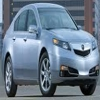

In [59]:
Image.open(path_df.iloc[3].path)

In [60]:
from scipy.spatial.distance import cosine
import numpy as np

embeddings_list = []
for image_path in path_df['path']:
    embedding = generate_image_embeddings(image_path)
    embeddings_list.append(embedding)

embeddings_matrix = np.array(embeddings_list)

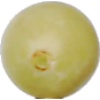

In [72]:
import random
selected_image_idx = random.randint(0, 30)
selected_image_path = path_df.iloc[selected_image_idx]['path']
Image.open(selected_image_path)

In [73]:
similarities = []
selected_embedding = embeddings_matrix[selected_image_idx]
for embedding in embeddings_matrix:
    similarity = 1 - cosine(selected_embedding, embedding)
    similarities.append(similarity)

In [74]:
path_df['similarity'] = similarities

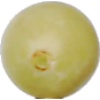

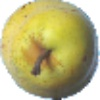

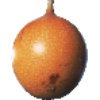

In [75]:
most_similar_images = path_df.sort_values(by='similarity', ascending=False).head(3)
for idx, row in most_similar_images.iterrows():
  path = row['path']
  display(Image.open(path))

In [76]:
print(embeddings_matrix)

[[0.         0.         0.00063373 ... 0.         0.08894785 0.        ]
 [0.08766864 0.         0.         ... 0.04555443 0.06515308 0.00100416]
 [0.         0.         0.         ... 0.         0.0252993  0.        ]
 ...
 [0.00105203 0.         0.00110823 ... 0.         0.0813878  0.        ]
 [0.01660367 0.         0.         ... 0.         0.0540891  0.        ]
 [0.12969403 0.         0.         ... 0.04774767 0.08911587 0.        ]]


In [77]:
def project_vectors(data: NDArray, technique: str = "tsne", **options):
    if technique == "pca":
        transformer = PCA(**options)
    elif technique == "tsne":
        transformer = TSNE(**options)
    elif technique == "umap":
        raise NotImplementedError("UMAP is not yet supported.")
    else:
        raise ValueError(
            f"Invalid technique: {technique}. Choose from 'pca', 'tsne', or 'umap'."
        )

    transformed_data = transformer.fit_transform(data)
    return transformed_data


In [81]:
reduced_embeddings_matrix = project_vectors(embeddings_matrix, technique="tsne", n_components=2, random_state=0, perplexity=5)
reduced_embeddings_matrix.shape
reduced_embeddings_matrix

array([[-12.9228115,   8.533385 ],
       [ 14.634123 , -11.814875 ],
       [-14.7095785,   9.600864 ],
       [-23.862022 ,  12.366701 ],
       [ 14.941952 ,   8.708774 ],
       [-21.377262 ,  14.192328 ],
       [ 14.158053 , -13.087097 ],
       [ 15.03008  , -15.826242 ],
       [ -8.850123 , -27.321001 ],
       [-25.44505  ,  10.860609 ],
       [ -9.902788 , -29.199635 ],
       [ 27.142756 ,  12.386411 ],
       [ 11.348195 , -11.887127 ],
       [ 13.592472 ,  28.55128  ],
       [ 10.475955 ,  25.973349 ],
       [-21.349033 ,   8.463558 ],
       [ 28.954405 ,  12.626688 ],
       [ 13.044741 , -14.411227 ],
       [ 25.057722 ,  12.972431 ],
       [ 12.767989 ,  27.525204 ],
       [ 18.124096 , -12.450473 ],
       [ 12.172223 ,  25.312742 ],
       [-13.644847 , -31.647533 ],
       [-11.875176 , -30.407913 ],
       [-10.648217 , -33.567028 ],
       [ 15.836367 ,  12.051794 ],
       [  9.364871 ,  12.21737  ],
       [ 12.582784 ,   7.472196 ],
       [-19.460552 ,

In [86]:
df = pd.DataFrame(reduced_embeddings_matrix, columns=("x","y"))
df['class'] = path_df['class']
df

,x,y,class
0,-12.922812,8.533385,airplane
1,14.634123,-11.814875,fruit
2,-14.709579,9.600864,airplane
3,-23.862022,12.366701,car
4,14.941952,8.708774,dog
5,-21.377262,14.192328,motorbike
6,14.158053,-13.087097,fruit
7,15.030080,-15.826242,fruit
8,-8.850123,-27.321001,flower
9,-25.445049,10.860609,car


In [87]:
import plotly.express as px

fig = px.scatter(df, x="x", y="y", color="class")

fig.update_traces(textfont_size=25, marker=dict(size=25))
fig.update_layout(template="plotly")

fig.show()